## Skeleton Code

The code below provides a skeleton for the model building & training component of your project. You can add/remove/build on code however you see fit, this is meant as a starting point.

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

##Import any other stats/DL/ML packages you may need here. E.g. Keras, scikit-learn, etc.

## Do some early processing of your metadata for easier model training:

In [14]:
## Below is some helper code to read all of your full image filepaths into a dataframe for easier manipulation
## Load the NIH data to all_xray_df
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
40226,00010481_029.png,No Finding,29,10481,44,M,PA,2974,2721,0.143,0.143,NaN,/data/images_005/images/00010481_029.png
81493,00020037_015.png,No Finding,15,20037,45,M,AP,2544,3056,0.139,0.139,NaN,/data/images_009/images/00020037_015.png
39275,00010296_000.png,No Finding,0,10296,50,M,PA,2500,2048,0.168,0.168,NaN,/data/images_005/images/00010296_000.png


In [15]:
## Here you may want to create some extra columns in your table with binary indicators of certain diseases 
## rather than working directly with the 'Finding Labels' column

label_set = set()

for labels in all_xray_df['Finding Labels'].unique():
    for label in labels.split('|'):
        label_set.add(label)
label_set = sorted(label_set)
#print(label_set)

for label in label_set:
    all_xray_df[label] = np.where(all_xray_df['Finding Labels'].str.contains(label), 1, 0)

all_xray_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
48631,00012323_000.png,Nodule,0,12323,44,M,PA,2992,2991,0.143,...,0,0,0,0,0,0,1,0,0,0
5337,00001424_000.png,No Finding,0,1424,22,F,PA,2048,2500,0.168,...,0,0,0,0,0,1,0,0,0,0
4031,00001096_000.png,No Finding,0,1096,59,F,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
21221,00005673_002.png,No Finding,2,5673,41,M,PA,2500,2048,0.168,...,0,0,0,0,0,1,0,0,0,0
17401,00004673_016.png,Infiltration,16,4673,22,M,PA,2500,2048,0.168,...,0,0,0,1,0,0,0,0,0,0
47114,00012010_017.png,Infiltration,17,12010,54,M,AP,2500,2048,0.168,...,0,0,0,1,0,0,0,0,0,0
40982,00010613_004.png,No Finding,4,10613,56,M,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
7125,00001888_000.png,Atelectasis,0,1888,44,M,PA,2048,2500,0.171,...,0,0,0,0,0,0,0,0,0,0
78849,00019363_013.png,Infiltration,13,19363,55,F,AP,2500,2048,0.168,...,0,0,0,1,0,0,0,0,0,0
36556,00009638_000.png,No Finding,0,9638,28,M,AP,2500,2048,0.168,...,0,0,0,0,0,1,0,0,0,0


In [16]:
## Here we can create a new column called 'pneumonia_class' that will allow us to look at 
## images with or without pneumonia for binary classification

all_xray_df = all_xray_df.rename(columns={'Pneumonia': 'pneumonia_class'})
all_xray_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,pneumonia_class,Pneumothorax
38002,00009993_000.png,No Finding,0,9993,44,F,AP,2500,2048,0.168000,...,0,0,0,0,0,1,0,0,0,0
75762,00018606_001.png,No Finding,1,18606,78,F,AP,2500,2048,0.168000,...,0,0,0,0,0,1,0,0,0,0
17121,00004591_003.png,No Finding,3,4591,62,M,AP,2500,2048,0.171000,...,0,0,0,0,0,1,0,0,0,0
66266,00016397_008.png,No Finding,8,16397,45,F,PA,2694,2895,0.143000,...,0,0,0,0,0,1,0,0,0,0
55024,00013774_051.png,Effusion,51,13774,77,F,AP,2500,2048,0.168000,...,0,0,0,0,0,0,0,0,0,0
68906,00016991_009.png,No Finding,9,16991,31,F,AP,2500,2048,0.168000,...,0,0,0,0,0,1,0,0,0,0
94771,00024498_000.png,No Finding,0,24498,30,F,PA,2048,2500,0.168000,...,0,0,0,0,0,1,0,0,0,0
99030,00026194_009.png,Atelectasis,9,26194,11,F,AP,3056,2544,0.139000,...,0,0,0,0,0,0,0,0,0,0
67395,00016642_003.png,Infiltration,3,16642,34,F,PA,2814,2889,0.143000,...,0,0,0,1,0,0,0,0,0,0
111368,00030434_002.png,No Finding,2,30434,54,M,PA,1786,1981,0.194311,...,0,0,0,0,0,1,0,0,0,0


## Create your training and testing data:

In [17]:
import sklearn.model_selection as skl
from random import sample 

def create_splits(df):
    ## Either build your own or use a built-in library to split your original dataframe into two sets 
    ## that can be used for training and testing your model
    ## It's important to consider here how balanced or imbalanced you want each of those sets to be
    ## for the presence of pneumonia
    train_data, val_data = skl.train_test_split(df,
                                                test_size = 0.2, 
                                                stratify = df['pneumonia_class'])

    # we want to have equal proportions of pneumonia and not pneumonia for the training dataset.
    pneumonia_indexes = train_data[train_data.pneumonia_class==1].index.tolist()
    not_pneumonia_indexes = train_data[train_data.pneumonia_class==0].index.tolist()

    not_pneumonia_indexes_sample = sample(not_pneumonia_indexes,len(pneumonia_indexes))
    train_data = train_data.loc[pneumonia_indexes + not_pneumonia_indexes_sample]

    # we want to have about 20% positive pneumonia in the validaation data because 1.2% is a little sparse.
    pneumonia_indexes = val_data[val_data.pneumonia_class==1].index.tolist()
    not_pneumonia_indexes = val_data[val_data.pneumonia_class==0].index.tolist()

    #not_pneumonia_indexes_sample = sample(not_pneumonia_indexes,len(pneumonia_indexes)*4)
    not_pneumonia_indexes_sample = sample(not_pneumonia_indexes,len(pneumonia_indexes))
    val_data = val_data.loc[pneumonia_indexes + not_pneumonia_indexes_sample]
    
    return train_data, val_data

train_data, val_data = create_splits(all_xray_df)

print("number of images in train_data: {}".format(len(train_data)))
print("number of images in val_data:   {}".format(len(val_data)))

print("proportion of pneumonia_class in train_data: {}".format(train_data['pneumonia_class'].sum()/len(train_data)))
print("proportion of pneumonia_class in val_data:   {}".format(val_data['pneumonia_class'].sum()/len(val_data)))

number of images in train_data: 2290
number of images in val_data:   572
proportion of pneumonia_class in train_data: 0.5
proportion of pneumonia_class in val_data:   0.5


# Now we can begin our model-building & training

#### First suggestion: perform some image augmentation on your data

In [19]:
from keras.preprocessing.image import ImageDataGenerator

def my_image_augmentation(train=True):
    
    ## recommendation here to implement a package like Keras' ImageDataGenerator
    ## with some of the built-in augmentations 
    
    ## keep an eye out for types of augmentation that are or are not appropriate for medical imaging data
    ## Also keep in mind what sort of augmentation is or is not appropriate for testing vs validation data
    
    ## STAND-OUT SUGGESTION: implement some of your own custom augmentation that's *not*
    ## built into something like a Keras package
    
    # Todo
    if train:
        my_idg = ImageDataGenerator(rescale = 1./ 255.0,
                                    horizontal_flip = True, 
                                    vertical_flip = False, 
                                    height_shift_range = 0.1, 
                                    width_shift_range = 0.1, 
                                    rotation_range = 10, 
                                    shear_range = 0.05,
                                    zoom_range = 0.1,
                                    samplewise_center=True, #Set each sample mean to 0.
                                    samplewise_std_normalization=True  #Divide each input by its std.
                                   )
    else:
        my_idg = ImageDataGenerator(rescale = 1./ 255.0,
                                    horizontal_flip = True, 
                                    vertical_flip = False, 
                                    height_shift_range = 0.05, 
                                    width_shift_range = 0.05, 
                                    rotation_range = 5, 
                                    shear_range = 0.025,
                                    zoom_range = 0.05,
                                    samplewise_center=True, #Set each sample mean to 0.
                                    samplewise_std_normalization=True  #Divide each input by its std.)
                                   )

    return my_idg

IMG_SIZE = (224, 224)

def make_train_gen(train_df):
    
    ## Create the actual generators using the output of my_image_augmentation for your training data
    ## Suggestion here to use the flow_from_dataframe library, e.g.:
    my_train_idg = my_image_augmentation(train=False)
    
    train_gen = my_train_idg.flow_from_dataframe(dataframe=train_df, 
                                                 directory=None, 
                                                 x_col = 'path',
                                                 y_col = 'pneumonia_class',
                                                 class_mode = 'binary',
                                                 target_size = IMG_SIZE,
                                                 batch_size = 16)

    return train_gen


def make_val_gen(val_df):
    my_val_idg = my_image_augmentation(train=True)
    
    val_gen = my_val_idg.flow_from_dataframe(dataframe = val_df, 
                                                 directory=None, 
                                                 x_col = 'path',
                                                 y_col = 'pneumonia_class',
                                                 class_mode = 'binary',
                                                 target_size = IMG_SIZE,
                                                 batch_size = 64) 
    
    # Todo
    return val_gen

In [20]:
## May want to pull a single large batch of random validation data for testing after each epoch:
train_data['pneumonia_class'] = train_data['pneumonia_class'].apply(str)
val_data['pneumonia_class'] = val_data['pneumonia_class'].apply(str)

train_gen = make_train_gen(train_data)
val_gen = make_val_gen(val_data)

valX, valY = val_gen.next()

Found 2290 validated image filenames belonging to 2 classes.
Found 572 validated image filenames belonging to 2 classes.


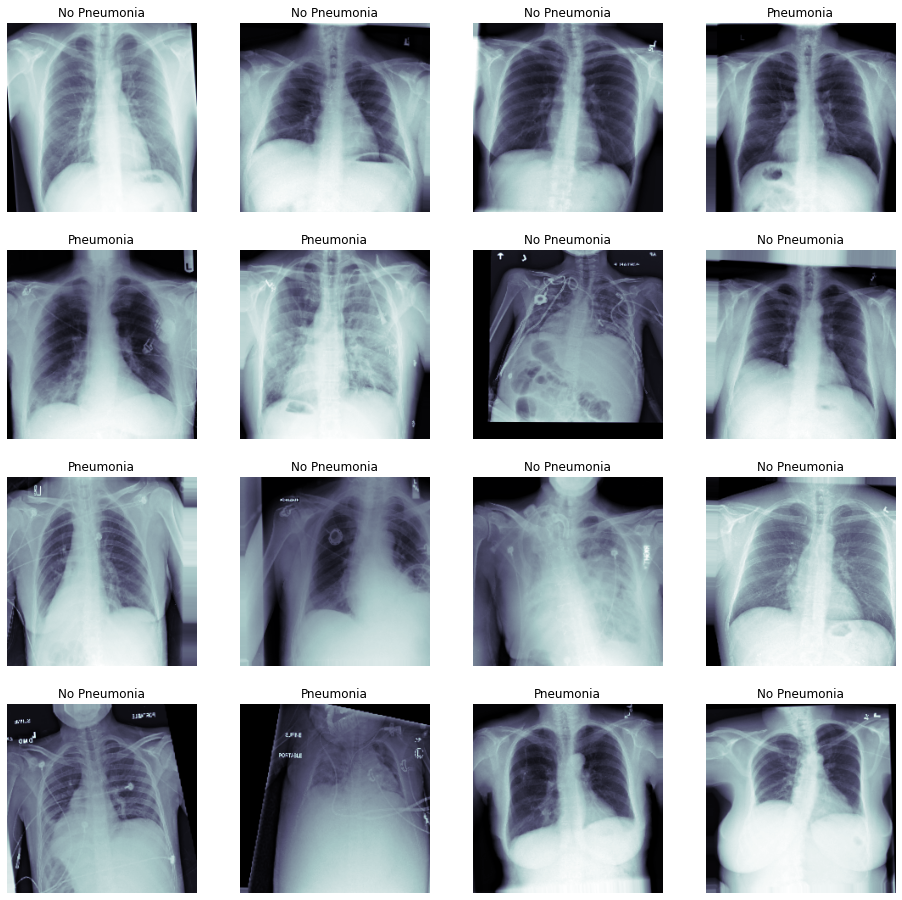

In [21]:
## May want to look at some examples of our augmented training data. 
## This is helpful for understanding the extent to which data is being manipulated prior to training, 
## and can be compared with how the raw data look prior to augmentation

t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    if c_y == 1: 
        c_ax.set_title('Pneumonia')
    else:
        c_ax.set_title('No Pneumonia')
    c_ax.axis('off')

## Build your model: 

Recommendation here to use a pre-trained network downloaded from Keras for fine-tuning

In [22]:
from keras.applications.vgg16 import VGG16


def load_pretrained_model():
    
    layer_of_interest = 'block5_pool'
    
    model = VGG16(include_top=True, weights='imagenet')
    transfer_layer = model.get_layer(layer_of_interest)
    vgg_model = Model(inputs = model.input, outputs = transfer_layer.output)
    
    return vgg_model

#model = load_pretrained_model()


In [23]:
from keras.layers import Dense, Flatten, Dropout  #GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D 
from keras.optimizers import Adam
from keras.models import Sequential, Model

def build_my_model():
    
    my_model = Sequential()
    
    # ....add your pre-trained model, and then whatever additional layers you think you might
    # want for fine-tuning (Flatteen, Dense, Dropout, etc.)
    pretrained_model = load_pretrained_model()
    my_model.add(pretrained_model)
    
    # Flatten the output of the VGG16 model because it is from a
    # convolutional layer.
    my_model.add(Flatten())
    
    # Add a dropout-layer which may prevent overfitting and
    # improve generalization ability to unseen data e.g. the test-set.
    my_model.add(Dropout(0.5))

    my_model.add(Dense(2048, activation='relu'))
    
    # Add a dropout-layer which may prevent overfitting and
    # improve generalization ability to unseen data e.g. the test-set.
    my_model.add(Dropout(0.5))
    
    my_model.add(Dense(1024, activation='relu'))
    
#     # Add a dropout-layer which may prevent overfitting and
#     # improve generalization ability to unseen data e.g. the test-set.
#     my_model.add(Dropout(0.5))
    
#     my_model.add(Dense(512, activation='relu'))
    
    # Add a dropout-layer which may prevent overfitting and
    # improve generalization ability to unseen data e.g. the test-set.
    my_model.add(Dropout(0.5))
    
    my_model.add(Dense(1, activation='sigmoid')) # Change the activation function to sigmoid so output of the last layer is in the range of [0,1] 

    # if you want to compile your model within this function, consider which layers of your pre-trained model, 
    # you want to freeze before you compile 
    #for layer in my_model.layers[0:17]:
    for (idx, layer) in enumerate(my_model.layers):
        #print("       ", layer.name, layer.trainable)
        if idx <= 1:
            layer.trainable = False
        else:
            layer.trainable = True
        print("       ", layer.name, layer.trainable)
        
    # also make sure you set your optimizer, loss function, and metrics to monitor
    optimizer = Adam(learning_rate=1e-3)
    loss = 'binary_crossentropy'
    metrics = ['binary_accuracy']

    my_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    
    return my_model

## STAND-OUT Suggestion: choose another output layer besides just the last classification layer of your modele
## to output class activation maps to aid in clinical interpretation of your model's results

model = build_my_model()

print()
print()
for layer in model.layers:
    print(layer.name, layer.trainable)
print()
print()
model.summary()

        model_3 False
        flatten_3 False
        dropout_9 True
        dense_9 True
        dropout_10 True
        dense_10 True
        dropout_11 True
        dense_11 True


model_3 False
flatten_3 False
dropout_9 True
dense_9 True
dropout_10 True
dense_10 True
dropout_11 True
dense_11 True


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Model)              (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 2048)              51382272  
_________________________________________________________________
dropout_10 (Dr

In [24]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

## Below is some helper code that will allow you to add checkpoints to your model,
## This will save the 'best' version of your model by comparing it to previous epochs of training

## Note that you need to choose which metric to monitor for your model's 'best' performance if using this code. 
## The 'patience' parameter is set to 10, meaning that your model will train for ten epochs without seeing
## improvement before quitting

# Todo

model_path = 'xray_model.hdf5'
weight_path="{}_my_model.best.hdf5".format('xray_class')

weight_path='./weights'
checkpoint_monitor = 'val_loss'


checkpoint = ModelCheckpoint(weight_path, 
                             monitor=checkpoint_monitor, #CHOOSE_METRIC_TO_MONITOR_FOR_PERFORMANCE, 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min', #CHOOSE_MIN_OR_MAX_FOR_YOUR_METRIC, 
                             save_weights_only=True)

early = EarlyStopping(monitor=checkpoint_monitor, # SAME_AS_METRIC_CHOSEN_ABOVE, 
                      mode='min', #CHOOSE_MIN_OR_MAX_FOR_YOUR_METRIC, 
                      patience=10)

reduce_lr = ReduceLROnPlateau(checkpoint_monitor=checkpoint_monitor,
                              factor=0.1,
                              patience=4,
                              verbose=1,
                              mode="auto",
                              min_delta=0.0001,
                              cooldown=0,
                              min_lr=0)

callbacks_list = [checkpoint, early, reduce_lr]

my_model = build_my_model()

        model_4 False
        flatten_4 False
        dropout_12 True
        dense_12 True
        dropout_13 True
        dense_13 True
        dropout_14 True
        dense_14 True


### Start training! 

In [25]:
## train your model


# Todo
my_model.save(model_path)
history = my_model.fit_generator(train_gen, 
                                 validation_data = (valX, valY), 
                                 #validation_data = val_gen, 
                                 epochs = 30, 
                                 callbacks = callbacks_list)

Epoch 1/30
144/144 [==============================] - 67s 468ms/step - loss: 1.9228 - binary_accuracy: 0.5419 - val_loss: 0.7834 - val_binary_accuracy: 0.4375

Epoch 00001: val_loss improved from inf to 0.78339, saving model to ./weights
Epoch 2/30
144/144 [==============================] - 59s 407ms/step - loss: 0.7089 - binary_accuracy: 0.5751 - val_loss: 0.7325 - val_binary_accuracy: 0.4375

Epoch 00002: val_loss improved from 0.78339 to 0.73248, saving model to ./weights
Epoch 3/30
144/144 [==============================] - 59s 409ms/step - loss: 0.6956 - binary_accuracy: 0.5699 - val_loss: 0.7656 - val_binary_accuracy: 0.4531

Epoch 00003: val_loss did not improve from 0.73248
Epoch 4/30
144/144 [==============================] - 59s 409ms/step - loss: 0.6844 - binary_accuracy: 0.5817 - val_loss: 0.6561 - val_binary_accuracy: 0.5938

Epoch 00004: val_loss improved from 0.73248 to 0.65608, saving model to ./weights
Epoch 5/30
144/144 [==============================] - 58s 406ms/ste

##### After training for some time, look at the performance of your model by plotting some performance statistics:

Note, these figures will come in handy for your FDA documentation later in the project

In [26]:
## After training, make some predictions to assess your model's overall performance
## Note that detecting pneumonia is hard even for trained expert radiologists, 
## so there is no need to make the model perfect.
my_model.load_weights(weight_path)
pred_Y = my_model.predict(valX, batch_size = 32, verbose = True)

64/64 [==============================] - 3s 49ms/step


In [27]:
import sklearn.metrics as metrics


def plot_auc(t_y, p_y):
    
    ## Hint: can use scikit-learn's built in functions here like roc_curve
    
    #sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
    fpr, tpr, thresholds = metrics.roc_curve(t_y, p_y)
    roc_auc = metrics.auc(fpr, tpr)
                      
    plt.figure(figsize=(8, 8))                                                 
    plt.title('ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    plt.show()
    
    # Todo
    
    return

## what other performance statistics do you want to include here besides AUC? 


# def ... 
# Todo

# def ...
# Todo
    
#Also consider plotting the history of your model training:

def plot_history(history):
    N = len(history.history["loss"])
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 8))
    plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), history.history["binary_accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), history.history["val_binary_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")

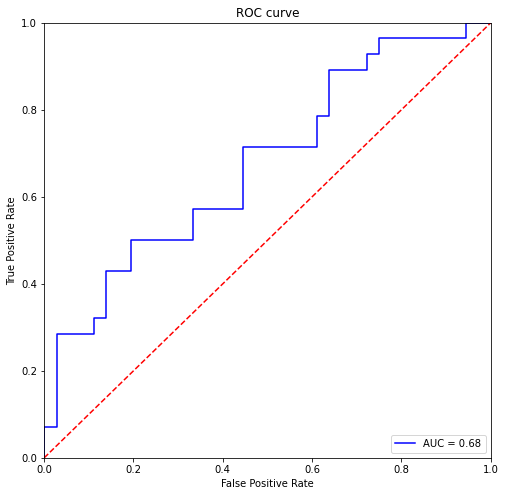

In [28]:
## plot figures

plot_auc(valY , pred_Y)

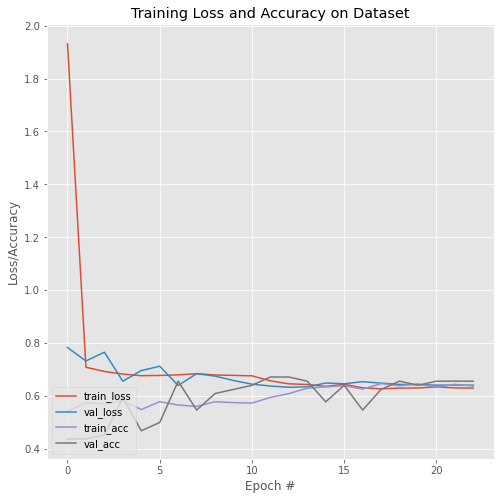

In [29]:
plot_history(history)

Once you feel you are done training, you'll need to decide the proper classification threshold that optimizes your model's performance for a given metric (e.g. accuracy, F1, precision, etc.  You decide) 

(25, 11, 25, 3, 56.25)


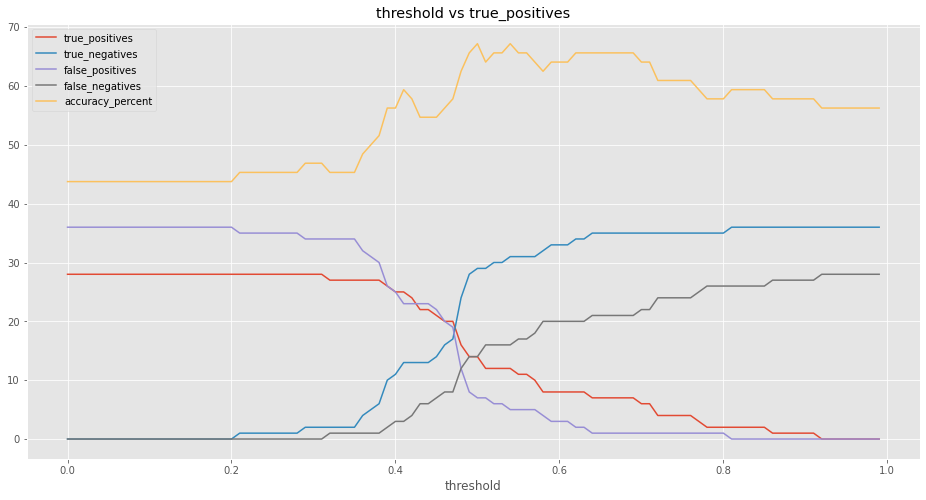

In [32]:
## Find the threshold that optimize your model's performance,
## and use that threshold to make binary classification. Make sure you take all your metrics into consideration.

def evaluate_threshold(threshold, valY, pred_Y):
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0

    for (val, pred) in zip(valY, pred_Y):
        pred_result = pred > threshold
        if pred_result and val == 1:
            true_positives += 1
        elif not pred_result and val == 0:
            true_negatives += 1
        elif pred_result and val == 0:
            false_positives += 1
        elif not pred_result and val == 1:
            false_negatives += 1
            
    accuracy = 100 * (true_positives + true_negatives) / len(valY)

    
    return true_positives, true_negatives, false_positives, false_negatives, accuracy


print (evaluate_threshold(.4, valY, pred_Y))

true_positive_array = []
true_negative_array = []
false_positive_array = []
false_negative_array = []
accuracy_array = []

for thresh in np.arange(0, 1, 0.01):
#for thresh in np.arange(0, 1, 0.01):
    true_positives, true_negatives, false_positives, false_negatives, accuracy = evaluate_threshold(thresh, valY, pred_Y)
    true_positive_array.append([thresh, true_positives])
    true_negative_array.append([thresh, true_negatives])
    false_positive_array.append([thresh, false_positives])
    false_negative_array.append([thresh, false_negatives])
    accuracy_array.append([thresh, accuracy])
      
plt.figure(figsize=(16, 8))
plt.plot([p[0] for p in true_positive_array], [p[1] for p in true_positive_array])
plt.plot([p[0] for p in true_negative_array], [p[1] for p in true_negative_array])
plt.plot([p[0] for p in false_positive_array], [p[1] for p in false_positive_array])
plt.plot([p[0] for p in false_negative_array], [p[1] for p in false_negative_array])
plt.plot([p[0] for p in accuracy_array], [p[1] for p in accuracy_array])
    
plt.title('threshold vs true_positives')
plt.xlabel('threshold')
plt.ylabel('')
plt.legend(['true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'accuracy_percent']);



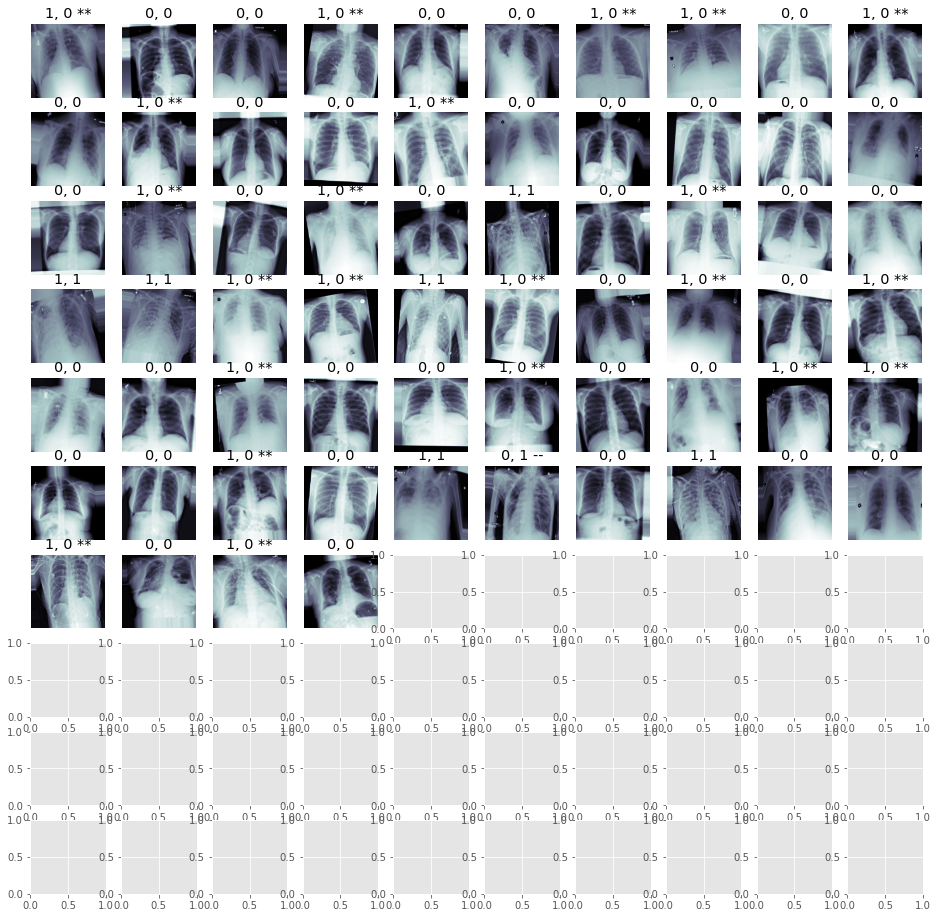

In [33]:
## Let's look at some examples of true vs. predicted with our best model: 

# Todo
YOUR_THRESHOLD = 0.4


fig, m_axs = plt.subplots(10, 10, figsize = (16, 16))
i = 0
#for (c_x, c_y, c_ax) in zip(valX[0:100], testY[0:100], m_axs.flatten()):
for (c_x, c_y, c_ax) in zip(valX[0:100], valY[0:100], m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    if c_y == 1: 
        if pred_Y[i] > YOUR_THRESHOLD:
            c_ax.set_title('1, 1')
        else:
            c_ax.set_title('1, 0 **')
    else:
        if pred_Y[i] > YOUR_THRESHOLD: 
            c_ax.set_title('0, 1 --')
        else:
            c_ax.set_title('0, 0')
    c_ax.axis('off')
    i=i+1

In [34]:
## Just save model architecture to a .json:

model_json = my_model.to_json()
with open("my_model.json", "w") as json_file:
    json_file.write(model_json)